Import Necessary Libraries📦

In [2]:
import warnings
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report 
from termcolor import colored 

warnings.filterwarnings('ignore') 

print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


Load The Dataset🔃

In [3]:
try:
    loan_data = pd.read_csv("loan_train.csv")
    
    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

THE DATASET LOADED SUCCESSFULLY...


Dataset Information

In [4]:
loan_data_rows = loan_data.head(7)
loan_data_rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
print("The shape =", loan_data.shape)

The shape = (614, 13)


In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Data Visualization 📊

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


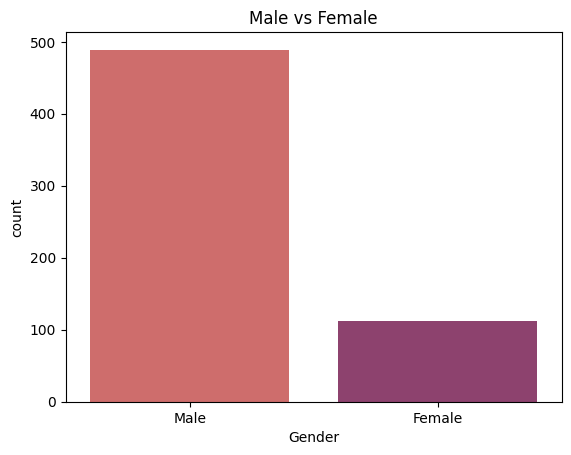

In [8]:
GenderAnalysis = loan_data.Gender.value_counts(dropna=False)
print(GenderAnalysis)

sns.countplot(x="Gender", data=loan_data, palette="flare")
plt.title("Male vs Female")
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


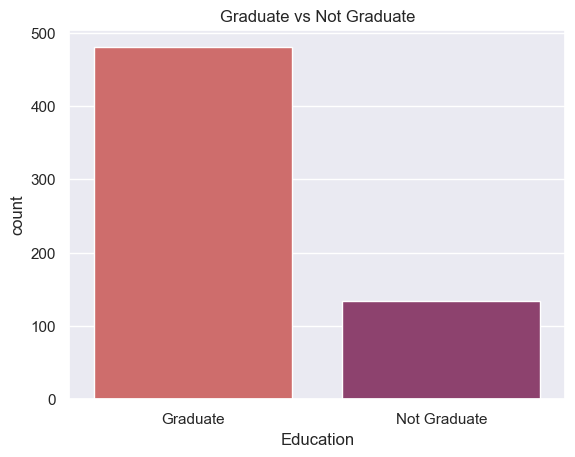

In [86]:
EducationAnalysis = loan_data.Education.value_counts(dropna=False)
print(EducationAnalysis)

sns.countplot(x="Education", data=loan_data, palette="flare")
plt.title("Graduate vs Not Graduate")
plt.show()

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


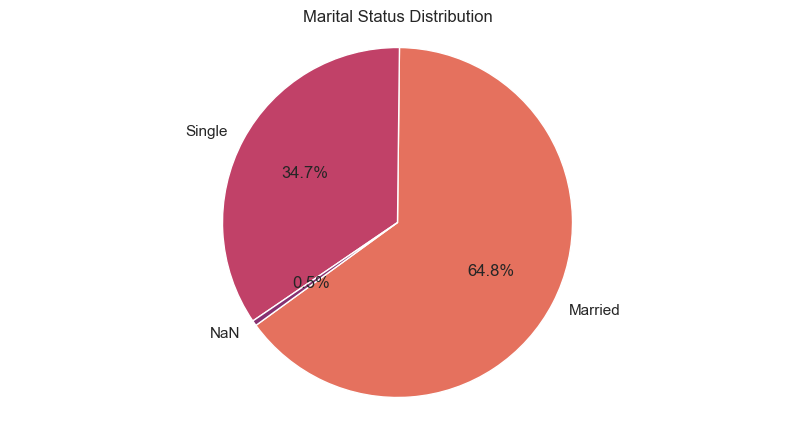

In [87]:
MarriedAnalysis = loan_data.Married.value_counts(dropna=False)
print(MarriedAnalysis)

plt.figure(figsize=(10, 5)) # figure in inches

plt.pie(MarriedAnalysis, 
        labels=[("Married"),("Single"),("NaN")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("flare", 
        len(MarriedAnalysis)))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

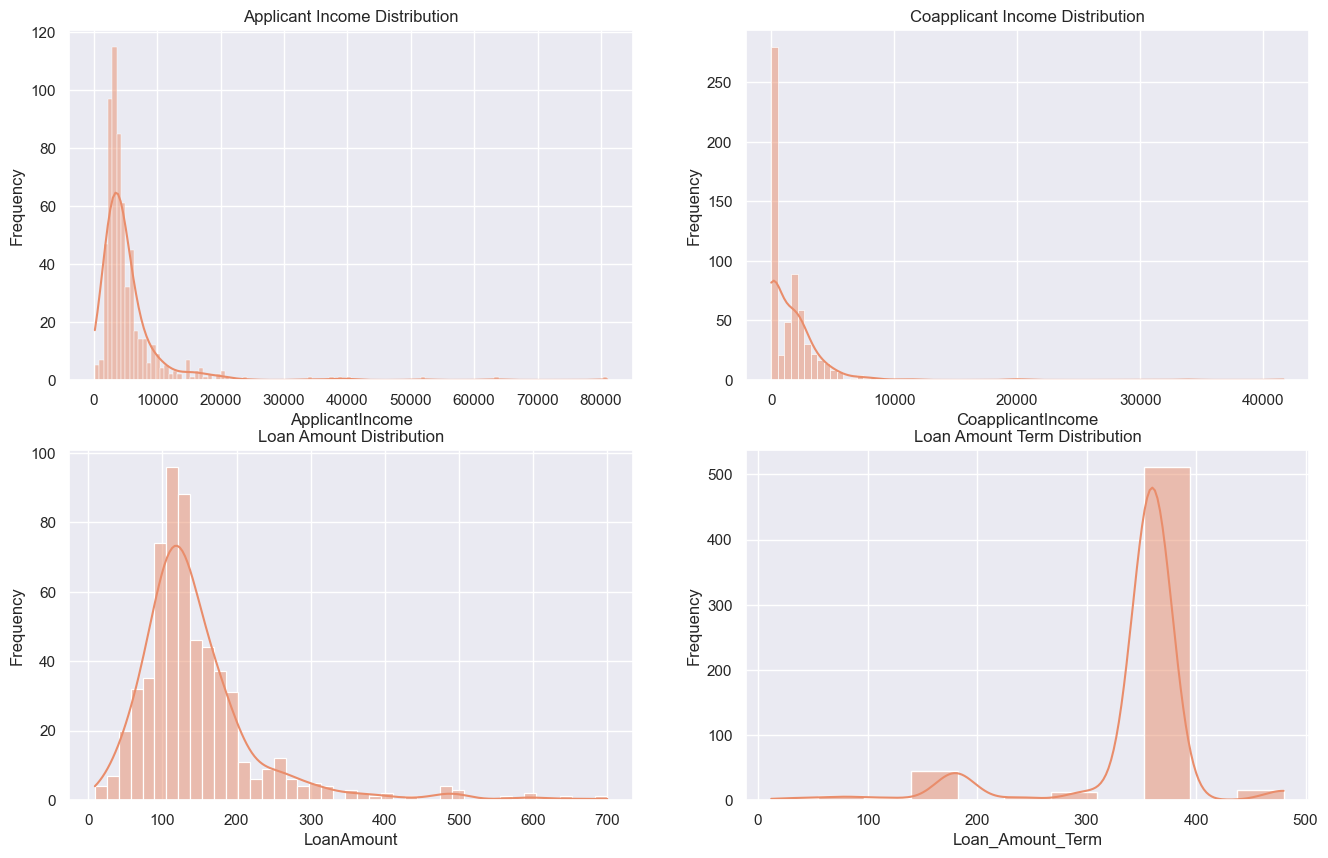

In [88]:
sns.set_theme(palette="flare")

def plot_distribution(ax, column, title):
    sns.histplot(data=loan_data, x=column, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Create a subplot grid with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot distribution for each numerical column
plot_distribution(axes[0, 0], "ApplicantIncome", "Applicant Income Distribution")
plot_distribution(axes[0, 1], "CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution(axes[1, 0], "LoanAmount", "Loan Amount Distribution")
plot_distribution(axes[1, 1], "Loan_Amount_Term", "Loan Amount Term Distribution")

Correlation Analysis

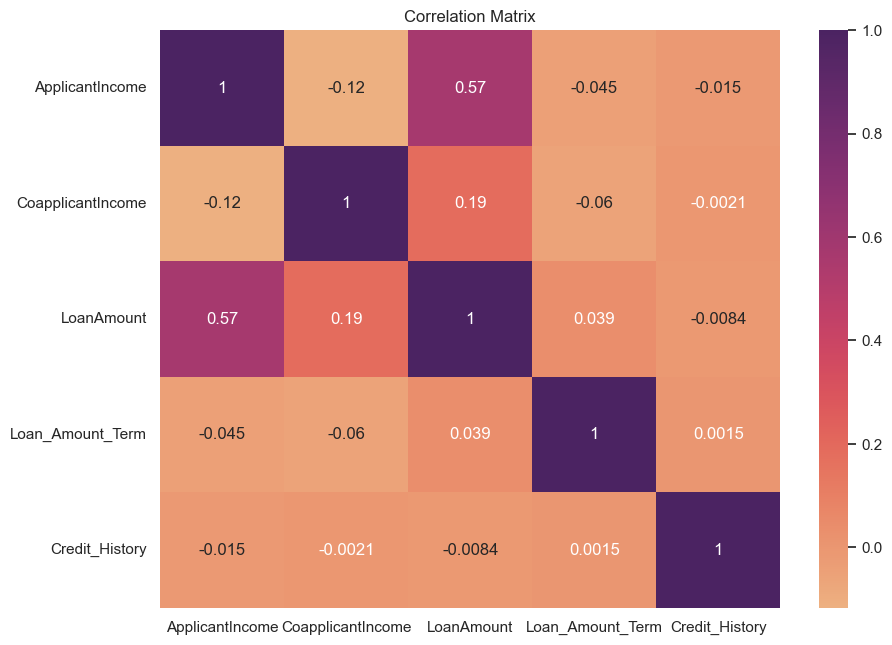

In [89]:
correlation_matrix = loan_data.corr(numeric_only=True)

plt.figure(figsize=(10, 7.5))

sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

plt.title('Correlation Matrix')
plt.show()

Remove Unneeded Features

In [9]:
loan_data.drop(['Loan_ID'], axis = 1 , inplace = True)

# Check the Loan_ID is dropped
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


Handling Missing Values

In [10]:
# Check for missing values
null_counts = loan_data.isnull().sum()

# Display the number of null values
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
_________________________________________________________________
Totally, there are 149 null values in the dataset.


In [11]:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])

loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())

loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])

loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])

In [12]:
# Check for missing values after handling
null_counts = loan_data.isnull().sum()

# Display the number of null values after handling
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
_________________________________________________________________
Totally, there are 0 null values in the dataset.


Encoding Categorical Variables

In [13]:
loan_data = pd.get_dummies(loan_data)

loan_data = loan_data.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1) # axis = 1 for column

newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

loan_data.rename(columns=newColunmsNames, inplace=True)

column_names = loan_data.columns.tolist()

print(colored("Column Names:", "blue",attrs=['reverse']))

for col in column_names:
    print(f"- {col}")
    
print("The shape =",loan_data.shape)
print("_______________________________________________")

# Display the first 5 rows of the transformed target variable
print(colored("Transformed Target Variable (Y):","blue", attrs=['reverse']))
print(loan_data['Loan_Status'].head())  # First 5 rows by default

Column Names:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status
The shape = (614, 17)
_______________________________________________
Transformed Target Variable (Y):
0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


Handling Outliers

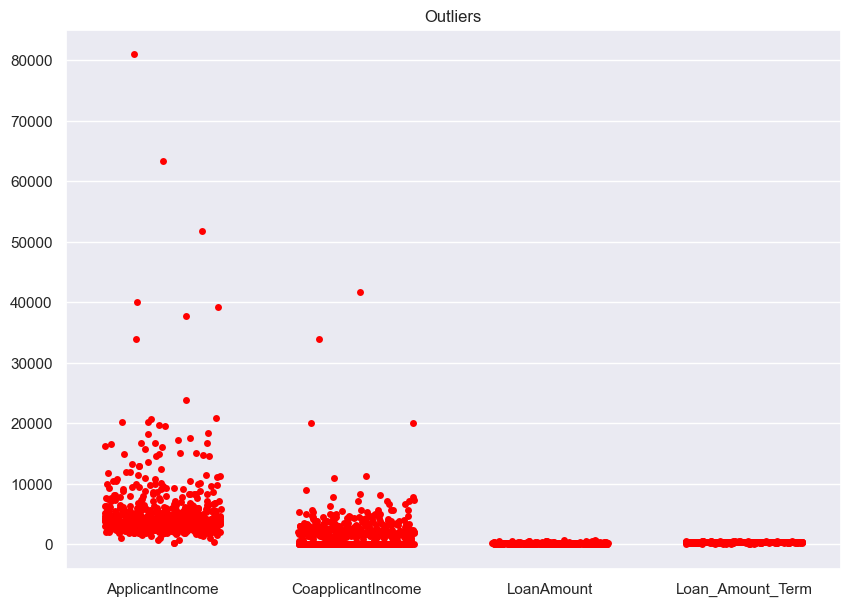

In [95]:
plt.figure(figsize=(10, 7))

outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

plt.title("Outliers")
plt.show()

In [14]:
# IQR Scaling
Q1 = loan_data.astype(np.float32).quantile(0.25)
Q3 = loan_data.astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Removing Qutliers
loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]


print(loan_data.shape)

print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

(136, 17)
The task has been completed without any errors....


In [15]:
# Square Root Transformation - to normalized the distribution.
loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

print(loan_data.shape)

(136, 17)


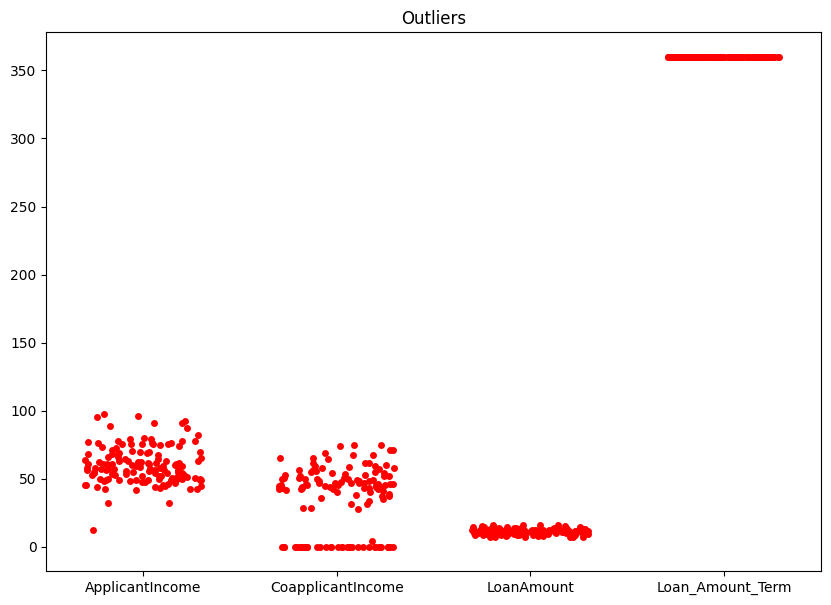

In [16]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

plt.title("Outliers")
plt.show()

Handling Duplicates

In [17]:
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column_name in columns_to_check:
    
    duplicate_count = loan_data[column_name].duplicated().sum()
    
    if duplicate_count == 0:
        print(colored(f"No duplicate entries found in the {column_name} column.", "green", attrs=['reverse']))
    else:
        print(colored(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan", attrs=['bold']))

Number of duplicate entries found in the ApplicantIncome column: 10
Number of duplicate entries found in the CoapplicantIncome column: 45
Number of duplicate entries found in the LoanAmount column: 57
Number of duplicate entries found in the Loan_Amount_Term column: 135
Number of duplicate entries found in the Credit_History column: 135


In [18]:
loan_data.head(7)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
13,43.046487,53.291650,10.677078,360.0,1.0,True,False,True,False,False,False,True,False,True,False,False,False
15,70.356236,0.000000,11.180340,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
19,50.990195,59.160798,10.723805,360.0,1.0,True,True,True,False,False,False,True,False,False,False,True,True
26,52.905576,47.465777,11.045361,360.0,1.0,True,True,True,False,False,False,True,False,False,True,False,True
31,56.276105,0.000000,8.602325,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,False


Data Preprocessing 👨‍💻

In [104]:
X = loan_data.drop(columns=['Loan_Status'])

Y = loan_data['Loan_Status']

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (136, 16)
Shape of Y: (136,)


In [106]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (108, 16)
Shape of X_test: (28, 16)
Shape of Y_train: (108,)
Shape of Y_test: (28,)


 Importing models for selection process

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
scoreListRF_Train = []
scoreListRF_Test = []
for max_dep in range(1, 10):
    # Iterate over different values of random_state
    for rand_state in range(1, 50):
        # Iterate over different values of n_estimators
        for n_est in range(1, 30):
            # Create a Random Forest model with the different values of max_depth, random_state, and n_estimators
            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            
            # Fit the model on the training data
            Model2.fit(X_train, Y_train)
            
            # Calculate and store the training accuracy
            scoreListRF_Train.append(Model2.score(X_train, Y_train))
            
            # Calculate and store the testing accuracy
            scoreListRF_Test.append(Model2.score(X_test, Y_test))

RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

Random Forest best accuracy (Training): 100.00%
Random Forest best accuracy (Testing): 96.43%
The Random Forest model has been trained successfully


In [112]:
import pickle
filename = 'loan_model.pkl'
pickle.dump(Model2, open(filename, 'wb'))

In [113]:
loaded_model = pickle.load(open(filename, 'rb'))

In [119]:
accuracy = loaded_model.score(X, Y)
accuracy

0.9779411764705882

In [115]:
predictions = loaded_model.predict(X)
predictions

array([ True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,